In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
#import datetime as dt
from datetime import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Start date and end date for trip

In [5]:
# Choose a start date and end date for your trip. 
vacation_date = '2010-04-01'

In [6]:
# Create Engine
engine = create_engine("sqlite:///hawaii.sqlite")
result = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
year = dt.strptime(vacation_date, '%Y-%m-%d') - timedelta(days=365)
print("My Vacation Date: ", vacation_date)
print("A year from my vacation: ", year)

measurements = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%Y-%m-%d", Measurement.date) > year)\
.order_by(Measurement.date.desc()).limit(15).all()
measurements

My Vacation Date:  2010-04-01
A year from my vacation:  2009-04-01 00:00:00


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0)]

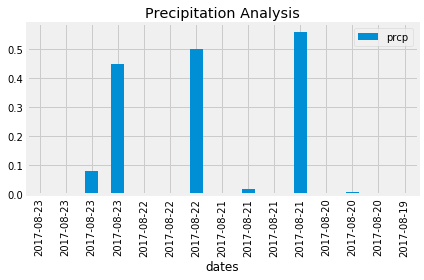

<Figure size 432x288 with 0 Axes>

In [12]:
#Select only the date and prcp values.
df = pd.DataFrame(measurements, columns=['dates', 'prcp'])

# X axis
df.set_index('dates', inplace=True)

# Plot the results using the DataFrame
df.plot.bar()
plt.title('Precipitation Analysis')
plt.tight_layout()
plt.show()
plt.savefig('Precipitation Analysis')

In [13]:
#Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,13.000000
mean,0.124615
std,0.218160
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,0.560000


# Station Analysis

In [14]:
# Hawaii Measurements - Station, Date, Precipitation and TOB
hawaii_measurements = "hawaii_measurements.csv"

# Read Hawaii Measurements Data and store into Pandas data frame
hawaii_measurements_pd = pd.read_csv(hawaii_measurements)
hawaii_measurements_pd

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [15]:
# Hawaii Stations - Station, name, latitude, longitude and elevation
hawaii_stations = "hawaii_stations.csv"

# Read Hawaii Stations Data and store into Pandas data frame
hawaii_stations_pd = pd.read_csv(hawaii_stations)
hawaii_stations_pd

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [16]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
print(f"There are {station_count} stations in this dataset")

There are 9 stations in this dataset


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.tobs)]

active_station = session.query(*sel).group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = '2017-08-23'
last_year = dt.strptime(last_date, '%Y-%m-%d') - timedelta(days=365)
last_year
print(f"{last_date} is the last day in this dataset.")
print(f"{last_year} is one year from the last day.")

last_year = '2016-08-23'
sel = [Measurement.id, Measurement.tobs]
session.query(*sel).filter(func.strftime("%Y-%m-%d", Measurement.date) > last_year).order_by(Measurement.tobs.desc()).limit(10).all()

2017-08-23 is the last day in this dataset.
2016-08-23 00:00:00 is one year from the last day.


[(2636, 87.0),
 (8991, 87.0),
 (12184, 85.0),
 (11854, 84.0),
 (11862, 84.0),
 (11863, 84.0),
 (12163, 84.0),
 (12167, 84.0),
 (12179, 84.0),
 (2655, 83.0)]

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
sel = [func.min(calc_temps), func.avg(calc_temps), func.max(calc_temps)]
sel 

[<sqlalchemy.sql.functions.min at 0x11a080cd0; min>,
 <sqlalchemy.sql.functions.Function at 0x11a080d50; avg>,
 <sqlalchemy.sql.functions.max at 0x11a080dd0; max>]

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = range(len(last_year))
ax.boxplot(sel, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()

NameError: name 'ax' is not defined

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
